In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import files
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tempfile
import keras
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers
from tensorflow.keras import Model
import numpy as np
from keras.preprocessing import image

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! kaggle datasets download -d techsash/waste-classification-data

waste-classification-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip waste-classification-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset/DATASET/TRAIN/R/R_5499.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_55.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_550.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5500.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5501.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5502.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5503.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5504.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5505.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5506.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5507.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5508.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5509.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_551.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5510.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5511.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5512.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5513.jpg  
  inflating: dataset/DATASET/TRAIN/R/R_5514.jpg  
  i

In [ ]:
base_dir="/content/DATASET"
train_dir=os.path.join(base_dir,"TRAIN")
test_dir=os.path.join(base_dir,"TEST")

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.1,
                                 zoom_range=0.1,
                                 horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator=train_datagen.flow_from_directory(train_dir,
                                                  target_size=(150,150),
                                                  batch_size=64,
                                                  class_mode='binary')

validation_generator=validation_datagen.flow_from_directory(test_dir,
                                                            target_size=(150,150),
                                                            batch_size=64,
                                                            class_mode='binary')

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [ ]:
pretrain_1=InceptionV3(input_shape=(150,150,3),include_top=False,weights='imagenet')
for layer in pretrain_1.layers:
      layer.trainable = False
last_layer = pretrain_1.get_layer('mixed7')

In [ ]:
pretrain_2=MobileNet(input_shape=(150,150,3),include_top=False,weights='imagenet')
for layers_1 in pretrain_2.layers:
  layers_1.trainable=False

In [ ]:
model = tf.keras.models.Sequential([
        # YOUR CODE HERE, end with a Neuron Dense, activated by 'sigmoid'
        tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128,activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

In [ ]:
xx = layers.Flatten()(last_layer.output)
xx = layers.Dense(1024,activation='relu')(xx)
xx = layers.Dropout(0.2)(xx)
xx = layers.Dense(32, activation='sigmoid')(xx)
xx = layers.Dropout(0.2)(xx)
xx = layers.Dense(1, activation='sigmoid')(xx)

model_1 = Model(pretrain_1.input, xx)

In [ ]:
model_2=tf.keras.models.Sequential([
                                    pretrain_2,
                                    tf.keras.layers.Dense(1,activation='relu'),
                                    tf.keras.layers.GlobalAveragePooling2D(),
                                    tf.keras.layers.Dense(1,activation='sigmoid')])

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self,epoch,logs={}):
        if((logs.get('accuracy')>0.85) and (logs.get('val_accuracy')>0.85)):
          self.model.stop_training = True

In [ ]:
model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 12s - loss: 0.7597 - accuracy: 0.6656 - val_loss: 0.6839 - val_accuracy: 0.6250 - 12s/epoch - 486ms/step
Epoch 2/50
25/25 - 11s - loss: 0.4736 - accuracy: 0.7731 - val_loss: 0.4139 - val_accuracy: 0.8562 - 11s/epoch - 449ms/step
Epoch 3/50
25/25 - 12s - loss: 0.4796 - accuracy: 0.7894 - val_loss: 0.3840 - val_accuracy: 0.8687 - 12s/epoch - 461ms/step
Epoch 4/50
25/25 - 11s - loss: 0.4482 - accuracy: 0.8081 - val_loss: 0.4306 - val_accuracy: 0.8313 - 11s/epoch - 446ms/step
Epoch 5/50
25/25 - 11s - loss: 0.4362 - accuracy: 0.8163 - val_loss: 0.3961 - val_accuracy: 0.8344 - 11s/epoch - 448ms/step
Epoch 6/50
25/25 - 11s - loss: 0.4477 - accuracy: 0.7969 - val_loss: 0.4131 - val_accuracy: 0.8500 - 11s/epoch - 449ms/step
Epoch 7/50
25/25 - 11s - loss: 0.4305 - accuracy: 0.8075 - val_loss: 0.3695 - val_accuracy: 0.8500 - 11s/epoch - 448ms/step
Epoch 8/50
25/25 - 11s - loss: 0.3971 - accuracy: 0.8256 - val_loss: 0.4019 - val_accuracy: 0.8469 - 11s/epoch - 449ms/step
Epoch 9/

In [ ]:
model_1.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model_1.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 17s - loss: 0.4824 - accuracy: 0.7824 - val_loss: 0.4061 - val_accuracy: 0.8531 - 17s/epoch - 694ms/step
Epoch 2/50
25/25 - 12s - loss: 0.3450 - accuracy: 0.8838 - val_loss: 0.3884 - val_accuracy: 0.8156 - 12s/epoch - 479ms/step
Epoch 3/50
25/25 - 12s - loss: 0.2855 - accuracy: 0.9075 - val_loss: 0.2844 - val_accuracy: 0.9062 - 12s/epoch - 480ms/step


In [ ]:
model_2.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=["accuracy"])
model_2.fit(train_generator,steps_per_epoch=25,epochs=50,validation_data=validation_generator,validation_steps=5,verbose=2,callbacks=myCallback())

Epoch 1/50
25/25 - 15s - loss: 0.6584 - accuracy: 0.5612 - val_loss: 0.5367 - val_accuracy: 0.5781 - 15s/epoch - 585ms/step
Epoch 2/50
25/25 - 11s - loss: 0.5188 - accuracy: 0.6975 - val_loss: 0.4733 - val_accuracy: 0.7688 - 11s/epoch - 451ms/step
Epoch 3/50
25/25 - 11s - loss: 0.4814 - accuracy: 0.8025 - val_loss: 0.4613 - val_accuracy: 0.8313 - 11s/epoch - 450ms/step
Epoch 4/50
25/25 - 11s - loss: 0.4495 - accuracy: 0.8612 - val_loss: 0.4489 - val_accuracy: 0.8438 - 11s/epoch - 458ms/step
Epoch 5/50
25/25 - 11s - loss: 0.4305 - accuracy: 0.8612 - val_loss: 0.4591 - val_accuracy: 0.8656 - 11s/epoch - 455ms/step


Saving O_12568.jpeg to O_12568.jpeg
Organik
Anorganik


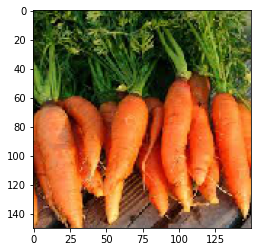

In [ ]:
uploaded = files.upload()                                                         

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))                             
  imgplot = plt.imshow(img)                                                       
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  classes_1=model_1.predict(images,batch_size=10)
  
  if classes==0:
    classes="Organik"
  else:
    classes="Anorganik"
  
  if classes_1==0:
    classes_1="Organik"
  else:
    classes_1="Anorganik"

  print(classes)
  print(classes_1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Mounted at /content/drive


In [ ]:
tf.saved_model.save(model,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial")
tf.saved_model.save(model_1,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3")
tf.saved_model.save(model_2,"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial/assets
INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet/assets


In [ ]:
# Convert the model
Model_InceptionV3 = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_InceptionV3"
# Convert the model
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_InceptionV3) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Convert the model
Model_MobileNet = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_MobileNet"
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_MobileNet) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Model_MobileNet.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
# Convert the model
Model_Sequensial = r"/content/drive/MyDrive/File Program MBKM/Project Capestone/Model_Sequensial"
converter = tf.compat.v1.lite.TFLiteConverter.from_saved_model(Model_Sequensial) # path to the SavedModel directory
tflite_model = converter.convert()

# Save the model.
with open('Model_Sequensial.tflite', 'wb') as f:
  f.write(tflite_model)